### Imports

In [31]:
#Packages needed: pydotplus - conda install -c conda-forge pydotplus=2.0.2

import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
import random
from random import shuffle
import time

%matplotlib inline 

## Graph Creation

In [32]:
def inv_matrix_creation(colors_array) :
    color_number = len(colors_array)
    mat = np.subtract(np.ones((color_number,color_number)),np.identity(color_number))
    return mat

In [33]:
# Creation of the Graph
G = nx.Graph()

G = nx.balanced_tree(2,3)

# positions for all nodes
#tree up to bottom
#pos=nx.nx_pydot.graphviz_layout(G,prog='dot')

#tree flat
pos=nx.nx_pydot.graphviz_layout(G)

colors = ['lightblue','pink','yellow','orange','lightgreen']

custom_node_color_test={}

for x in G.nodes():
    if G.degree(x) is 1 :
        custom_node_color_test[x] = random.choice(colors)
    else :
        custom_node_color_test[x] = 'lightgray'


"""nx.draw(G, pos, with_labels=False, arrows=True,
        nodelist = custom_node_color_test.keys(),
        node_color = list(custom_node_color_test.values()),
        node_size = 100)
"""

'nx.draw(G, pos, with_labels=False, arrows=True,\n        nodelist = custom_node_color_test.keys(),\n        node_color = list(custom_node_color_test.values()),\n        node_size = 100)\n'

In [34]:
H = nx.erdos_renyi_graph(20,0.2)
#pos2 = nx.circular_layout(H)
#nx.draw(H,pos2,with_labels=True)

colors = ['lightblue','pink','yellow','orange','lightgreen']

number_colors = len(colors)

nodes = H.nodes()
current_node = random.choice(nodes)

In [35]:
custom_node_color = {}
custom_node_size = {}
custom_edge_color = {}
marginals = {}

for x in H.nodes():
    custom_node_color[x] = random.choice(colors)
    marginals[x] = np.divide(np.ones(5),number_colors)
    #custom_node_size[x] = 500

for (x,y) in H.edges():
    custom_edge_color[(x,y)] = 'black'
    

#custom_node_color[current_node] = 'lightblue'
#custom_node_size[current_node] = 800

"""nx.draw(H, pos2, with_labels=True,
        nodelist = custom_node_color2.keys(),
        node_color = list(custom_node_color2.values()),
        node_size = list(custom_node_size.values()),
        edge_list = custom_edge_color.keys(),
        edge_color = list(custom_edge_color.values())
       )"""


'nx.draw(H, pos2, with_labels=True,\n        nodelist = custom_node_color2.keys(),\n        node_color = list(custom_node_color2.values()),\n        node_size = list(custom_node_size.values()),\n        edge_list = custom_edge_color.keys(),\n        edge_color = list(custom_edge_color.values())\n       )'

In [36]:
candidates_nodes = []
tree_nodes = [current_node]
discarded_nodes = []

In [37]:
for x in H.neighbors(current_node):
    #custom_node_color[x] = 'lightblue'
    #custom_node_size[x] = 500
    #custom_edge_color[(current_node,x)] = 'black'
    candidates_nodes.append(x)
    
custom_node_color[current_node] = 'blue'

"""nx.draw(H, pos2, with_labels=True,
        nodelist = custom_node_color2.keys(),
        node_color = list(custom_node_color.values()),
        node_size = list(custom_node_size.values()),
        edge_list = custom_edge_color.keys(),
        edge_color = custom_edge_color.values()
       )"""

'nx.draw(H, pos2, with_labels=True,\n        nodelist = custom_node_color2.keys(),\n        node_color = list(custom_node_color.values()),\n        node_size = list(custom_node_size.values()),\n        edge_list = custom_edge_color.keys(),\n        edge_color = custom_edge_color.values()\n       )'

In [38]:
while candidates_nodes :
    candidates_nodes = sorted(set(candidates_nodes))
    temp_candidate_node = candidates_nodes.copy()
    shuffle(temp_candidate_node)
    for x in temp_candidate_node:

        if not x in (discarded_nodes + tree_nodes) :
            temp = tree_nodes.copy()
            temp.append(x)
            I = H.subgraph(temp)

            if nx.is_tree(I) :
                tree_nodes.append(x)
                #custom_node_size[x] = 800
                #custom_node_color[x] = 'blue'
                neighbours = H.neighbors(x)
                temp_list = [z for z in neighbours if z not in (tree_nodes + discarded_nodes)]
                candidates_nodes.extend(temp_list)
            else : 
                discarded_nodes.append(x)
                #custom_node_color[x] = 'gray'
        candidates_nodes.remove(x)
"""nx.draw(H, pos2, with_labels=True,
        nodelist = custom_node_color2.keys(),
        node_color = list(custom_node_color.values()),
        node_size = list(custom_node_size.values()),
        edge_list = custom_edge_color.keys(),
        edge_color = custom_edge_color.values()
        )"""

'nx.draw(H, pos2, with_labels=True,\n        nodelist = custom_node_color2.keys(),\n        node_color = list(custom_node_color.values()),\n        node_size = list(custom_node_size.values()),\n        edge_list = custom_edge_color.keys(),\n        edge_color = custom_edge_color.values()\n        )'

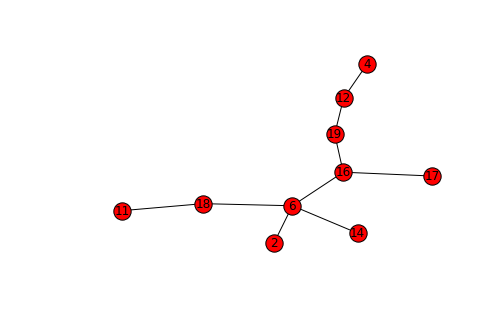

In [39]:
T = H.subgraph(tree_nodes)
posTree=nx.nx_pydot.graphviz_layout(T)
nx.draw(T, posTree, with_labels=True)

In [40]:
nx.degree_histogram(T)

[0, 5, 3, 1, 1]

In [41]:
len(T.nodes())

10

In [79]:
mat = inv_matrix_creation(colors)

tree_color = {}
tree_node_marginals = {}
tree_edge_marginals = {}
current_marginals_nodes = [x for x in T.nodes() if T.degree(x) is 1 and x is not current_node]
computed_marginals_nodes = []

for x in T.nodes():
    if T.degree(x) is 1 and x is not current_node:
        tree_color[x] = custom_node_color[x]
        tree_node_marginals[x] = marginals[x]
    else:
        tree_color[x] = 'white'
        

[17, 4, 11, 14]
[16, 12, 18, 6]
[17, 4, 11, 14]
dict_keys([(17, 16), (4, 12), (11, 18), (14, 6)])
16 [(17, 16)]
12 [(4, 12)]
18 [(11, 18)]
6 [(14, 6)]


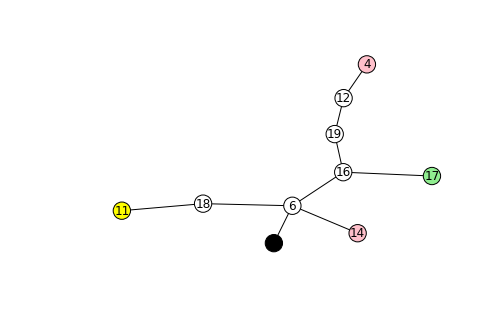

In [80]:
iteration_marginals_nodes = current_marginals_nodes.copy()
print(iteration_marginals_nodes)
for x in iteration_marginals_nodes :
    for y in T.neighbors(x) :        
        if x not in (current_marginals_nodes, computed_marginals_nodes) :
            tree_edge_marginals[(x,y)] = np.dot(tree_node_marginals[x],mat)
    if y not in (current_marginals_nodes,current_node) :
        current_marginals_nodes.append(y)
    current_marginals_nodes.remove(x)
    if x is not current_node : 
        computed_marginals_nodes.append(x)
print(current_marginals_nodes)
print(computed_marginals_nodes)
print(tree_edge_marginals.keys())

for x in current_marginals_nodes :
    incoming_edges = [item for item in tree_edge_marginals.keys() if x in item]
    print(x, incoming_edges)

tree_color[current_node] = 'black'
nx.draw(T, posTree, with_labels=True,
        nodelist = list(tree_color.keys()),
        node_color = list(tree_color.values())
       )

In [44]:
np.dot([0.5,0.5,0],[[0,1,1],[1,0,1],[1,1,0]])

array([ 0.5,  0.5,  1. ])

In [45]:
np.multiply(tree_edge_marginals[(1,13)],tree_edge_marginals[(4,13)],tree_edge_marginals[(7,3)])

KeyError: (1, 13)

In [46]:
iteration_marginals_nodes = current_marginals_nodes.copy()
for x in iteration_marginals_nodes :
    for y in T.neighbors(x) :        
        if x not in (current_marginals_nodes, computed_marginals_nodes,current_node) :
            tree_edge_marginals[(x,y)] = np.dot(tree_node_marginals[x],mat)
        if y not in (current_marginals_nodes,current_node) :
            current_marginals_nodes.append(y)
    current_marginals_nodes.remove(x)
    if x is not current_node : 
        computed_marginals_nodes.append(x)
print(current_marginals_nodes)
print(computed_marginals_nodes)
print(tree_edge_marginals.keys())

for x in current_marginals_nodes :
    incoming_edges = [item for item in tree_edge_marginals.keys() if x in item]
    print(x, incoming_edges)

tree_color[current_node] = 'black'
nx.draw(T, posTree, with_labels=True,
        nodelist = list(tree_color.keys()),
        node_color = list(tree_color.values())
       )


2